In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
tf.__version__

'2.15.0'

In [3]:
data_dir = 'Dataset'

In [4]:
data_dir

'Dataset'

In [21]:
image_h = 200
image_w = 200
batch_s = 16
validation_split = 0.2

In [6]:
train_set = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                         image_size=(image_h, image_w),
                                                         batch_size=batch_s,
                                                         seed=123,
                                                         validation_split=validation_split,
                                                         subset='training')

Found 41398 files belonging to 5 classes.
Using 33119 files for training.


In [7]:
val_set = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                      image_size=(image_h, image_w),
                                                      batch_size=batch_s,
                                                      seed=123,
                                                      validation_split=validation_split,
                                                      subset='validation')

Found 41398 files belonging to 5 classes.
Using 8279 files for validation.


In [8]:
class_names = train_set.class_names
class_names


['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']

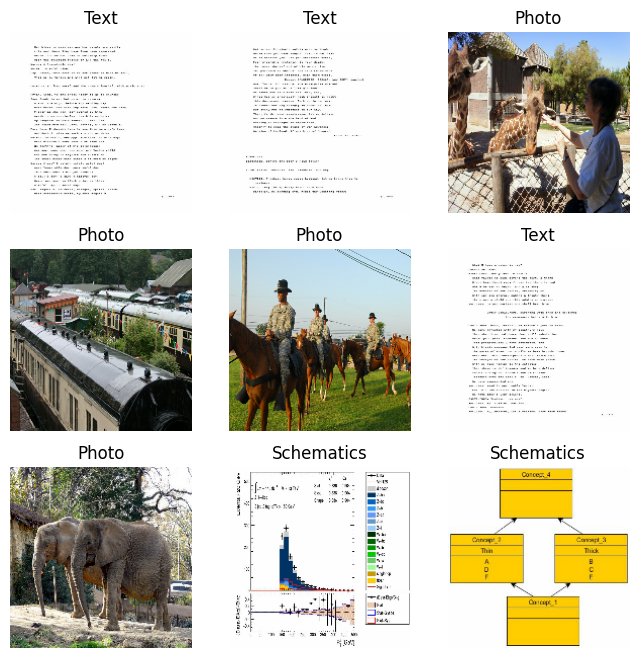

In [9]:
plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [10]:
images, labels = next(iter(train_set))  # Récupère le premier batch du jeu d'entraînement
print(images.shape)  # Affiche la forme du tenseur des images
print(labels.shape)  # Affiche la forme du tenseur des labels

(16, 180, 180, 3)
(16,)


In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = len(class_names) # Nombre de classes et donc aussi nombre de neurones dans la dernière couche
model = Sequential()

num_classes


5

In [22]:
dropout = 0.2

In [13]:
model.add(layers.Rescaling(
    1/255, input_shape=(image_h, image_w, 3)
    )
)

# Bloc convolutif ou la taille du filtre est de (16, 3)
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

# Bloc convolutif ou la taille du filtre est de (32, 3)
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

# Bloc convolutif ou la taille du filtre est de (64, 3)
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

# Applatissement de la couche
model.add(layers.Flatten())

# Couche entièrement connectée (couche dense)
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(dropout))

# Couche entièrement connectée retournant le résultat de la classification
model.add(layers.Dense(num_classes, activation='softmax'))

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [16]:
epochs = 10
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ]
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10


C:\Users\Téo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




2070/2070 [==============================] - 264s 103ms/step - loss: 0.4761 - accuracy: 0.8034 - val_loss: 0.3509 - val_accuracy: 0.8561
Epoch 2/10
2070/2070 [==============================] - 570s 275ms/step - loss: 0.2888 - accuracy: 0.8844 - val_loss: 0.3477 - val_accuracy: 0.8663
Epoch 3/10
2070/2070 [==============================] - 341s 165ms/step - loss: 0.2216 - accuracy: 0.9140 - val_loss: 0.2870 - val_accuracy: 0.8918
Epoch 4/10
2070/2070 [==============================] - 278s 134ms/step - loss: 0.1710 - accuracy: 0.9338 - val_loss: 0.3119 - val_accuracy: 0.8948
Epoch 5/10
2070/2070 [==============================] - 170s 82ms/step - loss: 0.1235 - accuracy: 0.9539 - val_loss: 0.5227 - val_accuracy: 0.8671
Epoch 6/10
2070/2070 [==============================] - 207s 100ms/step - loss: 0.0935 - accuracy: 0.9662 - val_loss: 0.5555 - val_accuracy: 0.8663
Epoch 7/10
2070/2070 [==============================] - 237s 115ms/step - loss: 0.0707 - accuracy: 0.9756 - val_loss: 0.47

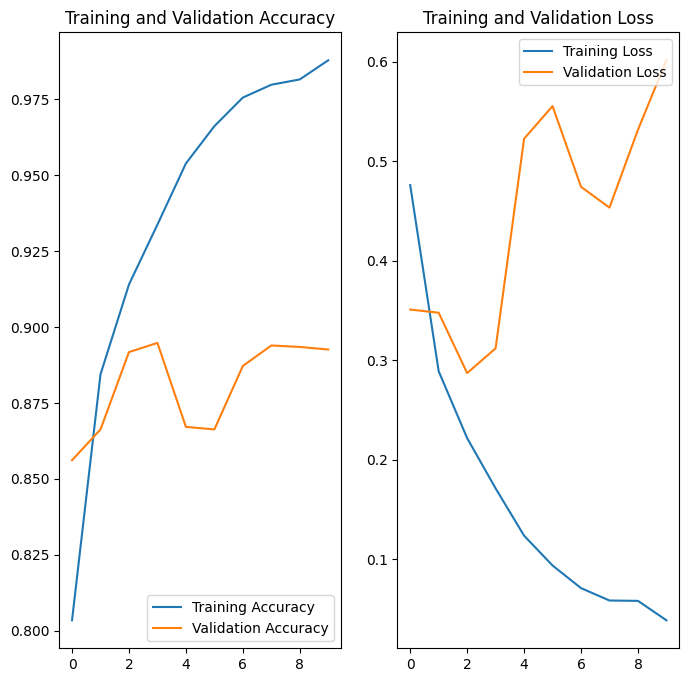

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(f'CNN Graphique/CNN_K3x3_B{batch_s}_IM{image_h}x{image_w}_VS{validation_split * 100}_DO{dropout * 100}_E{epochs}.png')

plt.show()

In [18]:
image = 'Texte.png'

In [19]:
image = tf.keras.utils.load_img(image, target_size=(image_h,image_w))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)
predictions = model.predict(img_bat)
score = tf.nn.softmax(predictions[0])
print('Image is {} with accuracy of {:0.2f}'.format(class_names[np.argmax(score)],np.max(score)*100))

1/1 [==============================] - 1s 1000ms/step
Image is Schematics with accuracy of 40.46


In [20]:
model.save('Save model/CNN_K3x3_B{batch_s}_IM{image_h}x{image_w}_VS{validation_split * 100}_DO{dropout * 100}_E{epochs}.keras')